<a href="https://colab.research.google.com/github/MaddyMk05/GuviProject/blob/main/guviproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_csv('cars_data.csv')


In [4]:
data.dropna(inplace=True)


In [5]:
label_encoders = {}
for column in ['Name', 'Location', 'Fuel_Type', 'Transmission']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [6]:
data['Mileage'] = data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' ', '').astype(float)
data['Engine'] = data['Engine'].astype(str).str.replace(' CC', '').str.replace(' ', '').astype(float)


In [7]:
data['Power'] = data['Power'].astype(str).str.replace(' bhp', '').str.replace(' ', '')
data['Power'].replace('null', np.nan, inplace=True)  # Replace 'null' with NaN
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')  # Convert to numeric, coercing errors to NaN

<ipython-input-7-89048a0943af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Power'].replace('null', np.nan, inplace=True)  # Replace 'null' with NaN


In [8]:
X = data.drop('Price', axis=1)
y = data['Price']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [14]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 1.4773153994819688
Mean Squared Error: 21.482825579355836


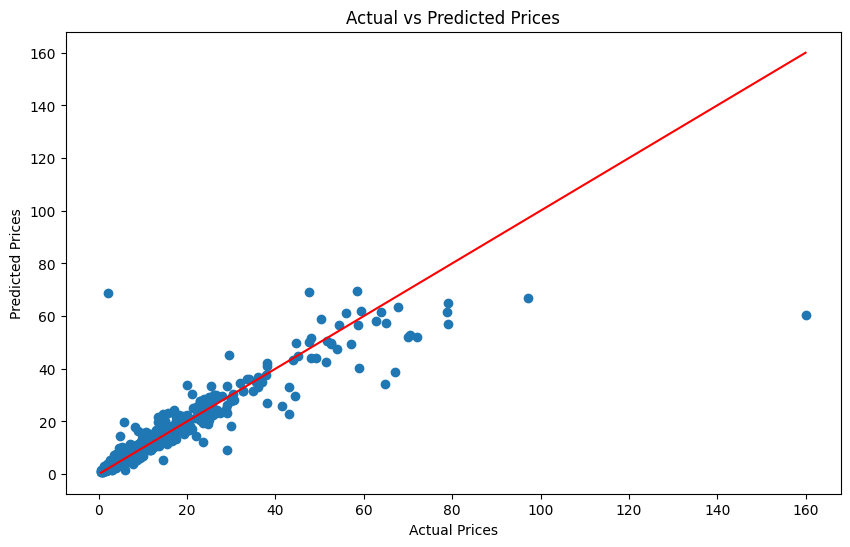

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [16]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


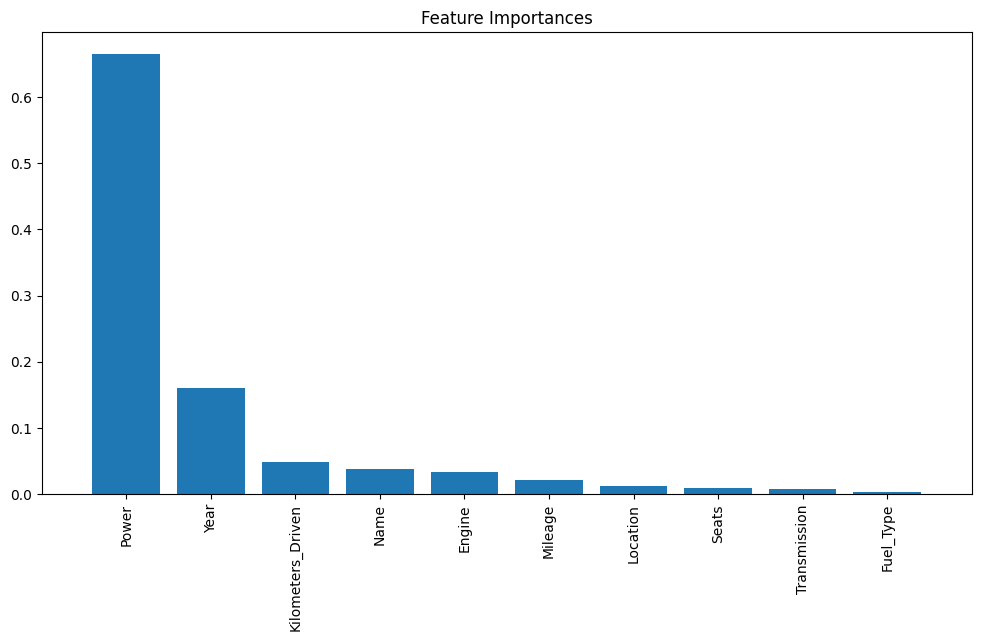

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()